<a href="https://colab.research.google.com/github/ktichola/ML-and-DL-to-Gravitational-waves-analysis/blob/main/Optimization_methods_in_deep_learning_%F0%9F%8F%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'pulsar-star:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F110566%2F264393%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240513%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240513T181854Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D56dfd3dee884ca545b388dd898ec2124c4d93ebcc972d0c10c0f43faf0de1c0d80992403342dd9a6e46216b44a6fc969be374f8f9ecd15c5b1fa1b1264865a955f3a3612c491ad79c43789c090db4bd9c56772e5bd6af71241915bc710463e953856e462a03cbef5e33cbf0bfd2a748d98a05ecfa3d66be0d0c22a91b1cc8f72dc8fe9d7fab1b08e94294776eaea9f416044277b215daa73b842be63095073b1e7b00c79a27ddd9661f3f0b7830f3262194b5b4e2b0368a11bd8854d9deb2d2c2b7957d88f2ced6b187ce8a18b9b36476e5858d8da9b614084a717626dc0a3bcb05fbf11f97fd3d20864049184e58a979b250982ead68d3b4d0a4ff4f8d71dc0,pulsar-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F644196%2F1142306%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240513%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240513T181854Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D42e009f1a40ee8fe1d32511d3649858b687e86351f2c6746bff3cbed907f5c456bf7a00395b7649b43e981d28d251fe4de2d2be5764fce4a00dac785811bccf899766f0ed028fd6e80fcfd5acf65acf7fbc20e30fdf1f12795e9565b1a94e744c9649bff146ddae10c8f690579aa966e5b508529c832eb9ed12db41d9f557b4dc2b69b877a7f511fdb42a6af4e11ea64036863683fe7ddcd613b0a8c6db0c6ddda65463ec644d19e2ef5ff374550adf3c327859f3f976b1948cfa246ec9e48eb5e9aeb3d48c7b2767851b6c565a4a38db22780ed3c96cb99aa48724e10e620f86274a504fbbbc20d17b08c0e03c3662ed813fd1d4feede59a3a9700cdbed97e9,predicting-pulsar-starintermediate:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F845444%2F1442600%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240513%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240513T181854Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D1a71ecababe6aea62c4587e51470d24ad4af64cf1d2b3eeb46ce27e072bc0c08252a34fe9e70205b948e1e7b2d5f79f100c4d1361f8c59ad4b1d449ea7afb5700165280eb0b2549356796e052d35b4e9f19230d73f9dda0fa83a9f55b35922dc96087c7576939bafa8cc681c23f47a54362b723fbf3caac4cd368ed5d25ec3874e6fc66dc24fab833435c56c4a7441f0f7db45e826c407e969e6d900f067ec758b6eb0104b9fa1575b1a1909e15a583c38efb52f94bbdebd0b731fd5fd3b14c4c26a3f17a6663ad611fc4e7aad964f2dc2520d4ef35ad5d5f256d2faab3ca76b5b4d6dd3afd24f23a9ff6144ac9899b7f6318e7ac05e1bfe572d58e10575c2c6,boston-housing-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3606821%2F6700194%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240513%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240513T181854Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2a247a9f8c45e1c89f51b1e78a9efab793b3519f8e11f4054abf5ff605731731997c58b58941a8605682531f66d6fa048d84d8bfa998f4467c5707ae6f48401f8431625e12171d0f48a2b4dff07b5b5078cb54c7221bd4190e5a59672b4b860c43146e001993a47c0d8f32fb796fa1e5ba9b8ebd5f12010b81c1873cdbff4a76e77e9ea9c20d9ed70d2c04d417e796ee1d3403ef5944ab0596986f75178f44df4a54e9f8d03da7511a785ebf0b7662d8433d7768abaebb9eee4ecbe9e31793f1f6b25474b3ff11c74d6194d1c8871539aef4535c5d13b816fdd8e94abe534e485c2966cd76c16b835e310867f7e565f545332c05e1e87fdcc3d98356728f1a6b'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


![ML from scratch course logo.png](attachment:2236e969-fb4b-43cf-b764-8d052959b3fc.png)

# 🏆**Optimization methods in machine learning and deep learning. From simple to complex**

This tutorial provides an overview of various popular (and not only) optimizers that are used in machine and deep learning, in particular for training neural networks. We will look at their main idea and key features, moving from simple to more complex concepts. In addition, at the end you will be able to find a large number of additional sources for a more detailed acquaintance with the material.

### <span style="color:darkred"> ***Some useful links before we start*** </span>

- Tutorials with popular ML-algorithms from scratch using Python you can find [**here**](https://www.kaggle.com/code/egazakharenko/all-popular-ml-algorithms-from-scratch-in-python)

- You can also download [**this notebook on GitHub**](https://github.com/egaoharu-kensei/ML-algorithms-from-scratch.-Course-for-beginners/blob/main/Notebooks%20%5Beng%5D/09%29%20Optimization%20methods%20in%20ML%20%26%20DL.ipynb)



# **A few words about the loss functions**

The loss functions can be divided into convex and non-convex. The first option is most often found in classical machine learning due to the relative simplicity of the models, as well as due to the fact that convex functions have a local minimum by definition and a global one (but not necessarily the only one). Non-convex functions, in turn, are most often found in neural networks due to their high complexity and in this case, finding a global minimum is a difficult task, therefore, in practice, methods from the case of convex functions are also used here because of their ability to well approximate stationary points in the non-convex case. Simply put, the methods for the convex case can converge well in the local optimum for the non-convex case in an acceptable time, the value of which is close to the global one.

# **Classic gradient descent**

To begin with, if the gradient is the vector of the fastest increase in the function, then the antigradient is the vector of the fastest decrease, and it is when moving in this direction that the minimum error of the model will be located. Then gradient descent can be defined as a numerical iterative optimization method for finding the weights (coefficients) of a model by minimizing its error, represented as a loss function. An example of how this algorithm works on linear and logistic regression from scratch can be viewed [here](https://www.kaggle.com/code/egazakharenko/linear-regression-from-scratch-its-types) and [here](https://www.kaggle.com/code/egazakharenko/logistic-softmax-regressions-from-scratch).

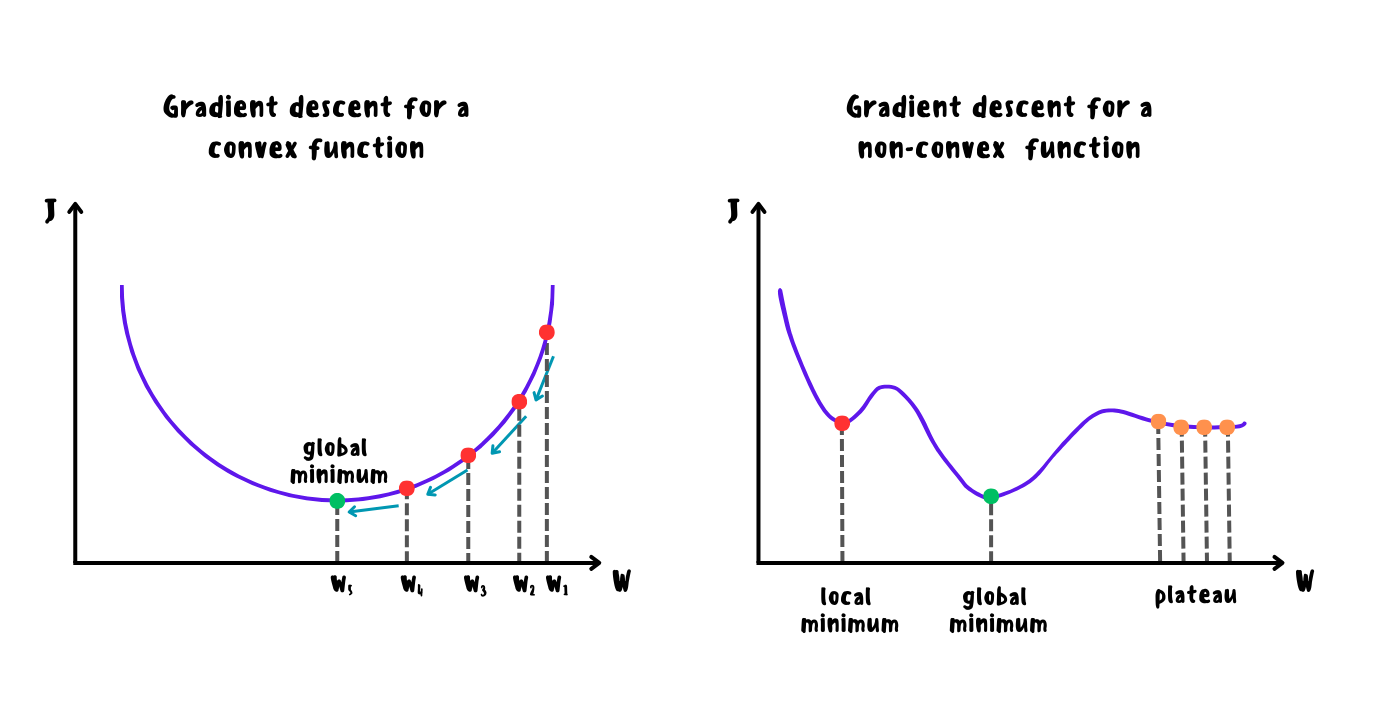

**The algorithm is constructed as follows:**
- 1) initially, weights with zero values are initialized;
- 2) then, based on the set weights, the model makes a prediction;
- 3) based on the obtained prediction, the error gradient is calculated, after which the weights are updated towards the anti-gradient of the loss function;
- 4) steps 2-3 are repeated until the gradient becomes zero, that is, until the algorithm converges to a minimum (as a rule, in this case, a stop criterion is used, for example, until the gradient difference in the current and previous iterations becomes less than a predetermined threshold value).

If a complete training set is used to calculate the gradients of the loss function, then a such gradient descent is called **batch**. Despite the fact that batch gradient descent is almost always well scaled in terms of the number of features, this algorithm works very slowly on large datasets and requires significant costs in the form of additional memory to store all gradients.

To increase performance on large datasets, 2 approaches are used:
- 1) **Mini-batch** gradient descent, when at each step the gradients are calculated on small random subsets (mini-packages). Usually, the size of a mini-batch is taken in the form of $2^n$ and can reach several tens of thousands of samples: the choice of size depends on the specifics of the task and the model used.

- 2) **Stochastic** gradient descent, when only one sample is taken from the training set at each step. Obviously, this option should work much faster than the previous one, but on the other hand, due to its even more stochastic nature, this algorithm is less stable and may require more iterations for convergence, as well as mini-batch gives an increase in performance due to hardware optimization of matrix calculations on the GPU. It is also worth noting that at the moment, stochastic gradient descent is very often referred to as a mini-batch.

Unlike batch gradient descent, in these cases the loss function will decrease in jumps up and down, approaching the minimum, but never reaching it. In the case of mini-batch gradient descent, the loss function will be located slightly closer to the minimum due to the smaller size of the jumps. On the other hand, unlike stochastic gradient descent, it may be more difficult for it to pass local minima in the non-convex case.

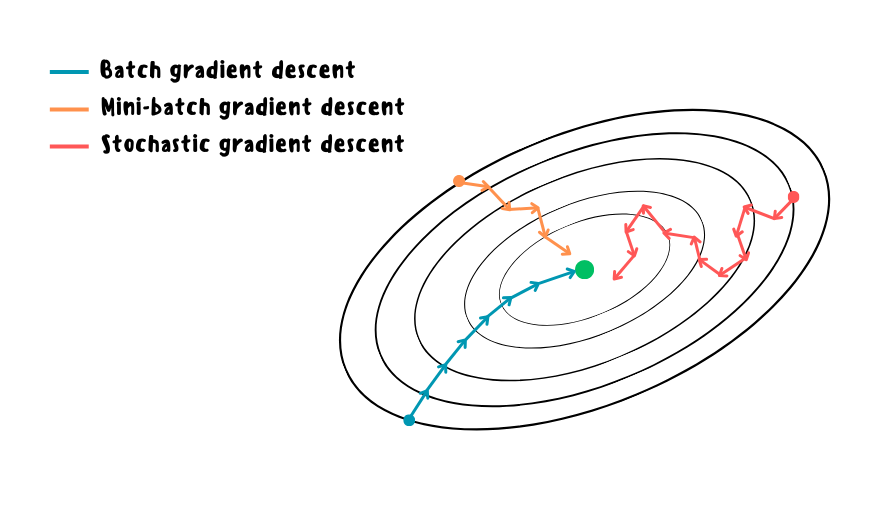

# **Faster and more accurate optimizers**

In addition to the fact that gradient descent in its classical representation is poorly suited for non-convex cases due to the problems described above, there may also be a problem with "saddle points" when there are points on the surface of the loss function in the form of a saddle where the value of the function is maximum in one direction and minimum in others, that is, at these points there will be almost zero decrease in gradients and they can be mistaken by the model for the optimum. Therefore, to find the optimal solution quickly, more interesting stochastic (mini-batch) optimizations are used, the most popular of which will be discussed now.

# **Momentum**
Suppose that a ball rolls down a slope with bumps, which at first will move slowly, but as kinetic energy accumulates, its speed will increase, which will help it overcome small bumps and stop its movement in a deeper one. It is this principle that underlies the momentum optimization. Momentum takes into account the values of the previous gradients, which are used to determine the direction and speed of movement in the parameter space $v_t$ (called the vector of the first momentum, since the mass in this case is 1), and to prevent its rapid increase, the momentum attenuation coefficient $\beta$ is used, which is responsible for the strength of the influence of the previous gradient on the current one, that is, acts as a mechanism for the ball to rub against the surface: a value of 0 means high friction, and 1 means no friction. Usually the value of $\beta$ is set to 0.9.

**Algorithm for updating the parameters of the momentum optimization**

$v_t \leftarrow \beta v_{t-1} - \alpha dw_{t-1}$

$w_t \leftarrow w_{t-1} + v_t$

Momentum is able to solve two problems at once: the poor conditionality of the Hesse matrix and the variance of the stochastic gradient. On the other hand, due to the calculation of the gradient of the loss function in the local position, the model may fluctuate around local minima, which in turn increases the convergence time.

Although in many articles $v_t$ is denoted as $m_t$, and $s_t$ as $v_t$, at the moment there is no single standard and in different articles you can find different designations for them, but for unification in all examples the following designations will be used: $v_t$ is the first momentum or anotheris the exponentially weighted moving average of the gradients, and $s_t$ is the second momentum or exponentially weighted moving average of the squares of the gradients, however, in the case of AdaGrad, it is just a square of gradients.

# **Nesterov momentum**
To solve the problem above, a small optimization is used, the essence of which is to calculate gradients not in a local position, but a little further in the direction of the momentum. In other words, the loss function will decrease not in the current position, but in which it supposedly should be in the future, following the direction of the momentum.

**Algorithm for updating the parameters of Nesterov's momentum optimization**

$v_t \leftarrow \beta v_{t-1} - \alpha d(w_{t-1} + \beta v_{t-1} )$

$w_t \leftarrow w_{t-1} + v_t$

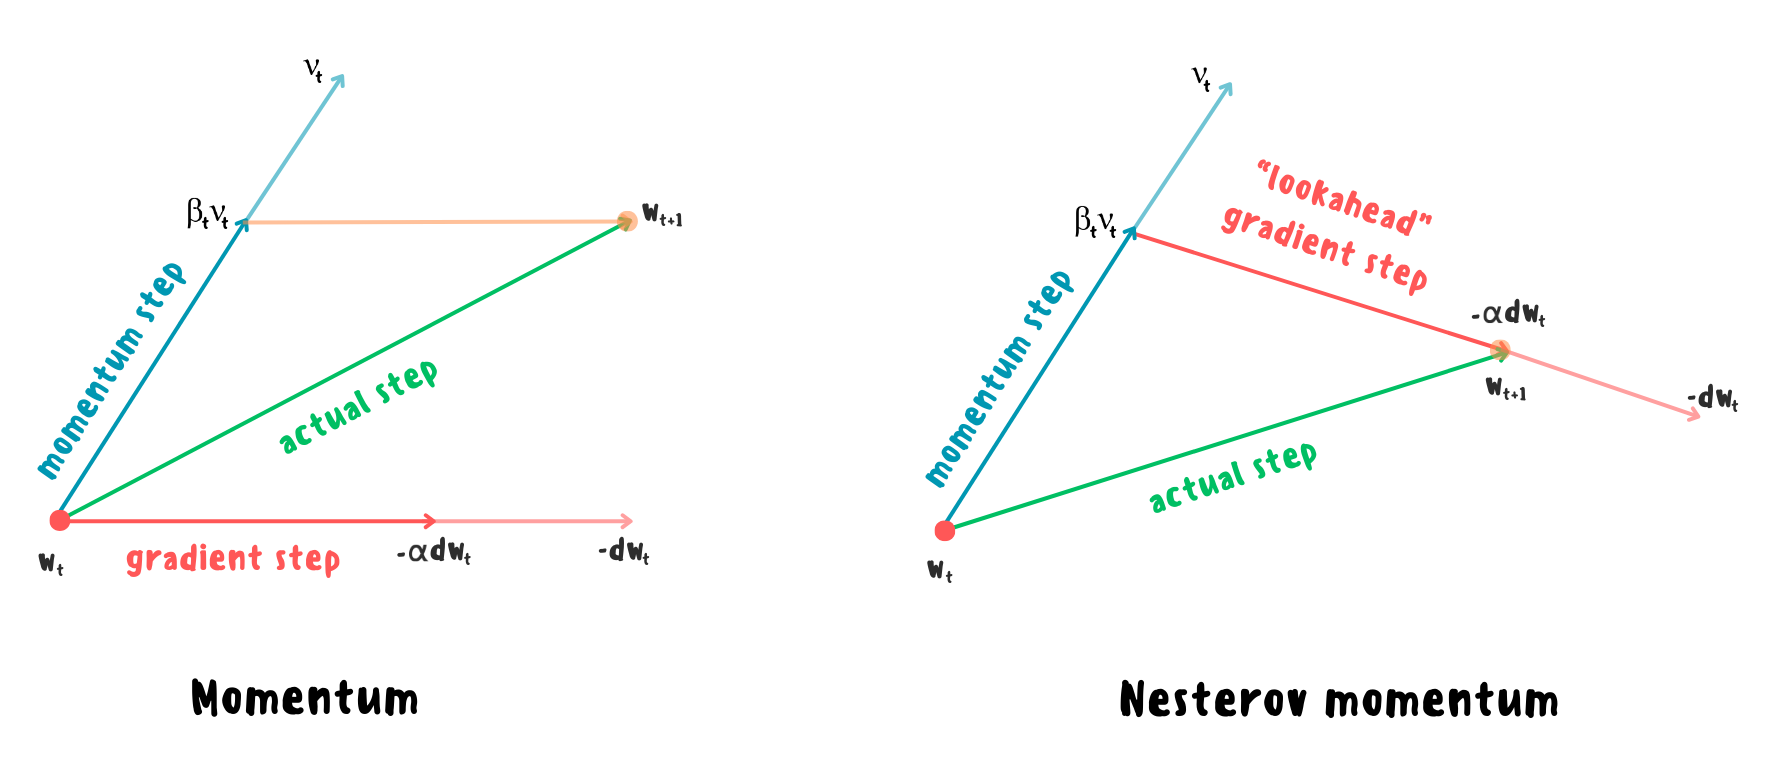

This approach allows you to converge much faster and a little closer to the optimum, but it can still be sensitive in some directions of the parameter space and insensitive in others due to the difficulties of selecting the optimal learning rate. The optimizations of gradient descent with adaptive learning rate will be presented below.

# **AdaGrad**
Adaptive Gradient is one of the first optimizations of gradient descent with adaptive step, in which the gradient decreases along the steepest directions. Simply put, at each step, the model parameters are updated taking into account the values of both the previous gradients and their squares.

**Algorithm for updating AdaGrad parameters**

$s_t \leftarrow s_{t-1} + dw_{t-1}^2$

$w_t \leftarrow w_{t-1} - \frac{\alpha}{\sqrt{s_t + \epsilon}} dw_{t-1}$

$\epsilon = 1e-8 \ - \ $ smoothing parameter to avoid division by zero

This simple approach allows the algorithm to start training quickly and then slow it down when the gradient gets smaller or changes a sign. However, in practice, AdaGrad copes well with convex cases, but when training neural networks, it often stops too early due to a rapid decrease in learning rate, without reaching the global optimum.

# **RMSProp**
RMSProp (Root Mean Square Propagation) is a modification of AdaGrad adapted to work better in the non-convex case. The main idea is to change the way the gradient is aggregated to an exponentially weighted moving average. In other words, instead of accumulating all the squares of the gradient from the beginning of training, the squares of the gradient accumulate only from the most recent iterations.

**The algorithm for updating the RMSProp parameters**

$s_t \leftarrow \beta s_{t-1} + (1 - \beta) dw_{t-1}^2$

$w_t \leftarrow w_{t-1} - \frac{\alpha}{\sqrt s_t + \epsilon} dw_{t-1}$

In general, RMSProp is an extremely effective optimization, but not the best one. For example, training difficulties may arise in multidimensional spaces due to problems scaling gradients in different directions.

# **Adam and its modifications**
Adam (Adaptive Moment Estimation) combines the concepts of Momentum and RMSProp, practically being a silver bullet in stochastic optimization problems. As you can see, the calculation of momentums in Adam is very similar to Momentum and RMSProp, except that an bias correction is applied to them. In general, thanks to such improvements, Adam converges faster and better than its predecessors, as well as is more resistant to the selection of hyperparameters, which makes it a more stable solution in most cases.

**Adam parameter update algorithm**

$v_t \leftarrow \beta_1 v_{t-1} + (1 - \beta_1) dw_{t-1}$

$s_t \leftarrow \beta_2 s_{t-1} + (1 - \beta_2) dw_{t-1}^2$

$w_t \leftarrow w_{t-1}  - \alpha \frac{v_t}{\sqrt s_t + \epsilon}$

$v_t \leftarrow \frac{v_t}{1 - \beta_1^t}\ - \ $ bias correction

$s_t \leftarrow \frac{s_t}{1 - \beta_2^t}\ - \ $ bias correction

$\beta_1 = 0.9, \ \ \beta_2 = 0.99 \ \ $ by default

On the other hand, this algorithm is more complex in analysis and can be sensitive to noise, which can lead to problems with convergence, and it also requires large amounts of memory, since it stores not only model parameters, but also information about gradients and accumulated momentum. In addition, Adam and all previous algorithms have another unpleasant drawback: if you continue training the model after an interruption at some point, you will have to restore not only the weights of the model from this point, but also all the information about the accumulated parameters.

However, time does not stand still and Adam modifications have been developed to eliminate the disadvantages described above to one degree or another. The most popular and interesting modifications include the following:

- **AdaMax** uses an exponentially weighted infinity norm to update the vector of the second momentum, that is, the learning rate changes based on the maximum gradient value in the history:

$$s_t \leftarrow max(\beta_2 s_{t-1} |dw_{t-1}|)$$

- **Nadam** (Nesterov-accelerated Adaptive Moment Estimation) uses a different bias correction for the first momentum vector:

$$\hat v_t \leftarrow \frac{(1 - \beta_1^t) dw_{t-1}}{1 - \Pi_{i=1}^{t} \beta_1^i} + \frac{\beta_1^{t+1} v_t}{1 - \Pi_{i=1}^{t+1} \beta_1^i}$$

- **AdamW** adds L2-regularization to the loss function and when updating the weights:

$$w_t \leftarrow w_{t-1}  - \frac{\alpha v_t}{\sqrt s_t + \epsilon} + \lambda w_{t-1}$$

- **Yogi** updates the second momentum vector, taking into account the difference of the second momentum and the square of the gradient:

$$s_t \leftarrow  s_{t-1} - (1 - \beta_2) sign(s_{t-1} - dw_{t-1}^2) dw_{t-1}^2$$

- **Adan** (Adaptive Nesterov Momentum) uses a modified New Nesterov Momentum (NME avoids the additional cost of calculating the gradient at the extrapolation point) to estimate the first and second moments, which significantly speeds up convergence and finds an approximate first-order point with a given accuracy $\epsilon$. The scheme of the algorithm is as follows:

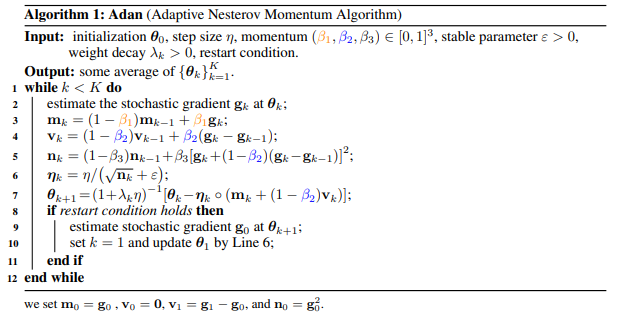

# **Training and visualization of optimizers**

For clarity, let's look at a small example of how various optimizers work on a [Boston Housing](https://www.kaggle.com/datasets/arunjangir245/boston-housing-dataset) dataset. First, we will create a simple neural network in Pytorch and train it on all the training data, on which we will then evaluate the reduction in optimizers losses at each iteration. Also, for Keras fans, we will train a simple neural network on mini-packages, but we will already evaluate the losses reduction on the test set.

**Downloading and preparing the dataset**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df_path = "/kaggle/input/pulsar-dataset/pulsar_stars.csv"
boston = pd.read_csv(df_path)
print(boston)

        Mean of the integrated profile  \
0                           140.562500   
1                           102.507812   
2                           103.015625   
3                           136.750000   
4                            88.726562   
...                                ...   
17893                       136.429688   
17894                       122.554688   
17895                       119.335938   
17896                       114.507812   
17897                        57.062500   

        Standard deviation of the integrated profile  \
0                                          55.683782   
1                                          58.882430   
2                                          39.341649   
3                                          57.178449   
4                                          40.672225   
...                                              ...   
17893                                      59.847421   
17894                                      49.4

In [ ]:
print(boston.isna().sum())

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64


In [ ]:
boston.dropna(inplace=True)

X, y = boston.iloc[:, :-1].values, boston.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train_s = StandardScaler().fit_transform(X_train)
X_test_s = StandardScaler().fit_transform(X_test)

**Neural network parameters**

In [ ]:
nn_params = {'in_features': X.shape[1], 'h1': 16, 'h2': 8, 'out': 1}

**Pytorch optimizers comparison based on training data**

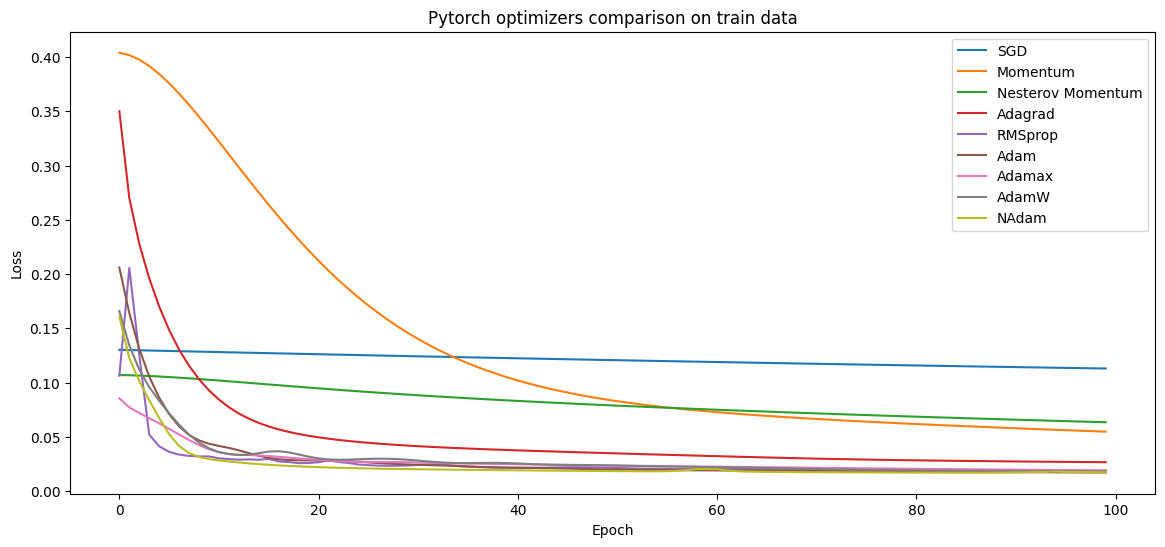

In [ ]:
from torch import nn, optim, FloatTensor, relu, manual_seed


class TorchNN(nn.Module):
    def __init__(self, in_features, h1, h2, out):
        super(TorchNN, self).__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, out)

    def forward(self, x):
        x = relu(self.fc1(x))
        x = relu(self.fc2(x))
        x = self.fc3(x)

        return x


def torch_losses(data, model, optim_cls, optim_params, num_epochs=100):
    losses = []
    X_train, y_train = data
    criterion = nn.MSELoss()
    optimizer = optim_cls(model.parameters(), **optim_params)

    for epoch in range(num_epochs):
        y_pred = model.forward(X_train)
        loss = criterion(y_pred, y_train)
        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return losses


manual_seed(0)
X_train_s_tensor = FloatTensor(X_train_s)
y_train_tensor = FloatTensor(y_train).view(-1, 1)

torch_optimizers = [
    (optim.SGD, 'SGD', {'lr': 0.001}),
    (optim.SGD, 'Momentum', {'lr': 0.001, 'momentum': 0.9}),
    (optim.SGD, 'Nesterov Momentum', {'lr': 0.001, 'momentum': 0.9, 'nesterov': True}),
    (optim.Adagrad, 'Adagrad', {'lr': 0.01}),
    (optim.RMSprop, 'RMSprop', {'lr': 0.01}),
    (optim.Adam, 'Adam', {'lr': 0.01}),
    (optim.Adamax, 'Adamax', {'lr': 0.01}),
    (optim.AdamW, 'AdamW', {'lr': 0.01}),
    (optim.NAdam, 'NAdam', {'lr': 0.01})
    ]

# Visualization
plt.figure(figsize=(14, 6))

for optim_cls, optim_name, optim_params in torch_optimizers:
    nn_model = TorchNN(**nn_params)
    t_losses = torch_losses((X_train_s_tensor, y_train_tensor), nn_model, optim_cls, optim_params)
    plt.plot(range(len(t_losses)), t_losses, label=f'{optim_name}')

plt.title('Pytorch optimizers comparison on train data')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Keras optimizers comparison based on training data**

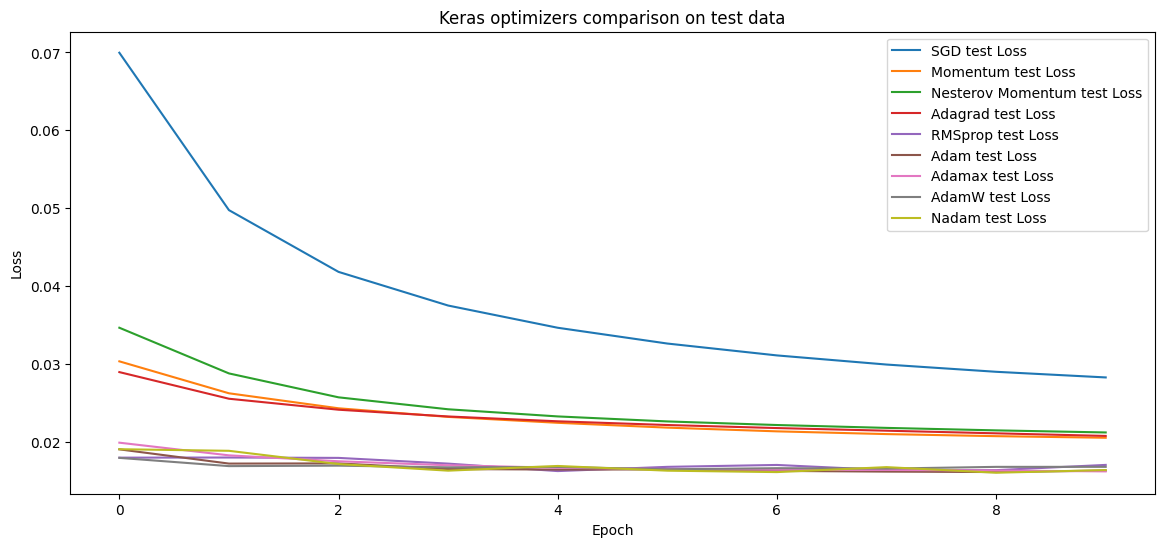

In [ ]:
from keras import optimizers
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import set_random_seed


def create_keras_nn(optimizer, in_features, h1, h2, out):
    model = Sequential()
    model.add(Dense(input_shape=(in_features,), units=h1, activation='relu'))
    model.add(Dense(input_shape=(h1,), units=h2, activation='relu'))
    model.add(Dense(units=out))
    model.compile(optimizer=optimizer, loss='mse', metrics=['mse'])

    return model


def keras_losses(train_data, test_data, optimizers, nn_params, num_epochs=10):
    losses = []
    X_train, y_train = train_data
    X_test, y_test = test_data

    for name, optimizer in optimizers:
        model = create_keras_nn(optimizer, **nn_params)
        model_history = model.fit(X_train, y_train, batch_size=32, epochs=num_epochs,
                                  verbose=0, validation_data=(X_test, y_test))
        losses.append((name, model_history.history['val_loss']))

    return losses


set_random_seed(0)

keras_optimizers = [
    ('SGD', optimizers.SGD(learning_rate=0.001)),
    ('Momentum', optimizers.SGD(learning_rate=0.001, momentum=0.9)),
    ('Nesterov Momentum', optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)),
    ('Adagrad', optimizers.Adagrad(learning_rate=0.01)),
    ('RMSprop', optimizers.RMSprop(learning_rate=0.01)),
    ('Adam', optimizers.Adam(learning_rate=0.01)),
    ('Adamax', optimizers.Adamax(learning_rate=0.01)),
    ('AdamW', optimizers.AdamW(learning_rate=0.01)),
    ('Nadam', optimizers.Nadam(learning_rate=0.01))
    ]


plt.figure(figsize=(14, 6))

k_losses = keras_losses((X_train_s, y_train), (X_test_s, y_test), keras_optimizers, nn_params)

for name, k_loss in k_losses:
    plt.plot(k_loss, label=name + ' test Loss')

plt.title('Keras optimizers comparison on test data')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### **Intermediate conclusions**

Since SDG, Momentum and Nesterov momentum are less stable algorithms and depend most on the initial values of the learning rate, they were given a lower learning rate than the other methods. The first plot shows that even in this case, these algorithms are slightly subject to fluctuations, although they quickly converged. The second plot demonstrates well how learning on mini-batches significantly accelerates the convergence of algorithms. In the case of AdaGrad, the classic problem of a sharp decrease in the learning rate arose, which in this case can be easily solved by initially setting a higher value. But RMSProp worked well in both cases and even better than Adam-like optimizers.

This leads to an interesting conclusion that adaptive methods can converge faster than their predecessors in far from every situation, but they minimize the loss function much more stably. Specifically, in this case, this means that if we set the same arbitrary learning rate values for all optimizers, then non-adaptive methods will often decrease with very large spurts and may not converge at all, while adaptive methods will converge more smoothly, albeit slowly.

It is worth adding that this example only proves once again that there is no universal optimizer that would be the best choice for all machine learning tasks, since much depends on a variety of factors, including the nature of the data, the complexity of the model and the learning goals. However, this does not negate the fact that in the case of complex loss landscapes, adaptive methods will almost always outperform simple stochastic optimizers, not only in terms of stability, but also, of course, in speed. Therefore, in most situations, RMSProp and especially the Adam family of optimizers can be considered as a good starting solution.

# **Disruption of adaptive methods with a moving average**
Since the work of all diagonal adaptive methods is more or less based on the use of a coordinate-wise learning rate, then in the case when the sequence $s_t$ stops monotonously decreasing, the algorithm cannot normally converge to local minima. As a rule, such a situation means approaching critical points and occurs when $dw_{t-1}^2$ decreases in comparison with the previous accumulated history with an accuracy of some constant.

This problem can be eliminated by endowing such algorithms with long-term memory of past gradients to eliminate negative regularizers, similar to how it is implemented in **AMSGrad**. Simply put, the condition $s_t >=s_{t-1}$ is fulfilled, which is possible thanks to a simple trick:

$$\hat s_0 = 0, \ \hat s_t = max(\hat s_{t-1}, s_t) \ and \ \hat S_t = \ diag(\hat s_t)$$

However, it should be borne in mind that in this case additional memory costs are required, which can be especially problematic for models with sparse parameters. This problem can be solved by using non-constant $\beta_1^t$ and $\beta_2^t$, which was proposed in the **AdamNC** algorithm:

$$v_t \leftarrow \beta_1^t v_{t-1} + (1 - \beta_1^t) dw_{t-1} \\
s_t \leftarrow \beta_2^t s_{t-1} + (1 - \beta_2^t) dw_{t-1}^2$$

Besides the fact that this approach does not require changing the structure of the original Adam, it also allows you to achieve good convergence rates.

However, in the work of Tran Thi Phuong and Le Trieu Phong, it was shown that the problem in proving the convergence of AMSGrad is to treat hyperparameters by treating them as equal, while this is not entirely true. So the authors presented a counterexample in the context of a simple convex optimization problem, which shows this problem. The algorithm should converge according to the following lemma:

$$R(T) \leq \sum_{i=1}^{d} \sum_{t=1}^{T} \frac{\sqrt{\hat{s}_{t,i}}}{2\alpha_t(1 - \beta_1^t)} ((w_{t,i} - w^*_{i})^2 - (w_{t+1,i} - w^*_{i})^2) + \sum_{i=1}^{d} \sum_{t=1}^{T} \frac{\alpha_t}{1 - \beta_1} \frac{v^2_{t,i}}{\sqrt{\hat{s}_{t,i}}} + \\ + \sum_{i=1}^{d} \sum_{t=2}^{T} \frac{\beta_1^t \sqrt{\hat{s}_{t-1,i}}}{2\alpha_{t-1}(1 - \beta_1)} (w_{t,i} - w^*_{i})^2$$

However, the problem lies in equality, which can actually be both positive and negative:

$$(w_{t,i} - w^*_{i})^2 - (w_{t+1,i} - w^*_{i})^2$$

Therefore, the authors presented a new proof of convergence for AMSGrad, as well as an algorithm **AdamX** based on it, which takes into account differences in hyperparameters and avoids the problem above. The solution looks like this:

$$\hat s_1 = s_1, \ \hat s_t = max \left(\frac{(1 - \beta_1^t)^2}{(1 - \beta_1^{t-1})^2} \hat s_{t-1}, s_t \right) \ \ if \ \ t \geq 2, \ and \ \hat S_t = diag(\hat s_t)$$

But it is worth bearing in mind that, as in the case of AMSGrad, AdamX also requires additional memory costs.

# **Strategies for changing the learning rate**
As you can see, the learning rate is one of the key parameters in gradient descent, which can have a significant impact on the convergence and final error of the model. In addition to the strategies described above to reduce the learning rate, some of the most popular are the following:
- 1) $\alpha = \frac{1}{1 + decay \_ rate * t} \alpha_0 \ - \ $ smooth decay;
- 2) $\alpha = k^t \alpha_0 \ - \ $ exponential decay;
- 3) $\alpha = \frac{k}{\sqrt{t}} \alpha_0$, $k\ - \ $ constant, $t \ - \ $ num iterations;
- 4) discrete reduction, when after a given number of iterations, the step decreases with a certain size.

Despite the fact that today algorithms based on gradient descent use automatic reduction of the learning rate both in the sckit-learn library and in deep learning libraries, the selection of the learning rate still needs to be carried out carefully: the algorithm may prematurely reach a plateau or completely cannot converge. An example is shown in the plot below.

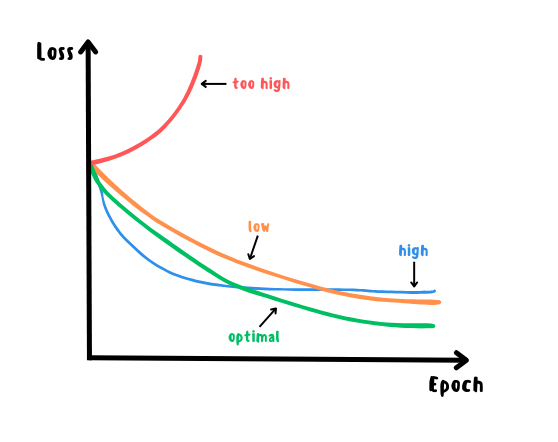

Another approach to changing the learning rate is to sharp increase it in order to "push" the model out of possible local minima in which it can get stuck in the training process. This approach is called **Warm Restart** and involves a cyclic change in the learning rate: starting from a high value, the speed gradually decreases according to a certain rule, and then after reaching the minimum value, it increases again. This is especially useful when the model converges to a suboptimal solution due to poor initialization or when the parameters space contains many local minima.

One of the popular methods using this approach is [CosineAnnealingWarmRestarts](https://pytorch.org/docs/stable/generated/torch.optim.lr_scheduler.CosineAnnealingWarmRestarts.html#torch.optim.lr_scheduler.CosineAnnealingWarmRestarts) in which the learning rate is adjusted based on "cosine annealing" with restarts, returning to its initial value:

$$η_t = η_{min} + \frac{1}{2}(η_{max} - η_{min})(1 + \cos(\frac{T_{cur}}{T_{i}}\pi))$$

Где:

- $\eta_t$ — the learning rate at a given time $t$;

- $\eta_{\text{max}}$ — initial learning rate;

- $\eta_{\text{min}}$ — minimum learning rate;

- $T_{\text{cur}}$ — the number of epochs since the last restart;

- $T_i$ — the number of epochs between two restarts.

The full list of learning rate schedulers can be found [here](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate) and [here](https://www.tensorflow.org/api_docs/python/tfm/optimization/lr_schedule).

# **Working with large mini-batches**
Consider a situation where we need to train a complex neural network on big data using multiple graphics processing units (GPUs). One of the simplest solutions will be to calculate stochastic gradients for each batch separately on different GPU, followed by averaging over all GPUs at each stage of updating the model parameters.

In fact, this approach is equivalent to learning with one huge batch and at first glance it may seem optimal, but not everything is so simple, since this can lead to such a phenomenon as the generalization gap, in which there is a deterioration in the generalizing ability of the model (sometimes significant). Why is this happening? When using a large batch, the optimizer begins to better recognize the landscape of the loss function for a certain sample, which increases the chances of slipping into narrow local minima with low generalizing ability. Then, even with a slight shift in the landscape (with the so-called distributive shift, when there is a transition from a training sample to a test one), the value of the loss function can increase dramatically. Simply put, large batches can lead to overfitting.

On the other hand, wide local minima are more resistant to changes in the landscape of the loss function and are able to provide a better generalizing ability, and in order to get into them, you can use optimizers with a more accurate dynamic selection of the learning rate, which will be discussed now. However, before doing this, it is worth adding that using small batches in optimization is also not a good idea, since this can lead to noisier gradient estimates and ultimately to underfitting of the model.

# **LARS**

The first in line will be Layer-wise Adaptive Rate Scaling (LARS), which uses momentum as the base algorithm. Its main idea is to select the learning rate not for each neuron or the entire neural network, but for each layer separately. Simply put, the weights are updated taking into account the local learning rate, calculated as the ratio of the norm of weights to the sum of the norm of weights and gradients. The operation of the algorithm is shown below:

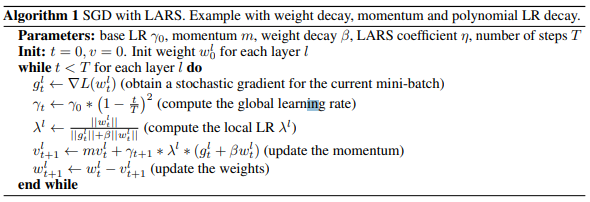

Despite the fact that this method allows you to use large-sized butches for learning without loss of quality, it does not cope well with complex models where each layer is important for overall performance, for example, with attention models such as BERT. This is due to the fact that if an unstable decrease in gradients is observed in one of the network layers, then a lower learning rate will be applied to this layer, and since LARS seeks to synchronize updates across all layers, the learning rates for more "stable" layers will be also reduced to prevent learning divergence. Hence, the more "stable" layers will not be updated as quickly as they could, which in the end will significantly slow down the training of the entire model and have a negative impact on the final result.

# **LAMB**

In response, a more advanced optimizer known as the Layerwise Adaptive Moments Based optimizer (LAMB) has been developed, which can be seen as an application of LARS to the Adam optimizer. The main difference is the use of a dual normalization strategy:
- 1) Normalization of each dimension (or a model parameter) relative to the square root of the second momentum used in Adam. This means that each parameter of the model is updated based on its own history of changes, which helps to adjust the weights of the model more precisely.
- 2) The application of layerwise normalization. In other words, the model parameters are updated taking into account the scale of each layer in the neural network. This helps to prevent too large changes in the weights of the layers and avoid instability in the learning process.

The algorithm works as follows:

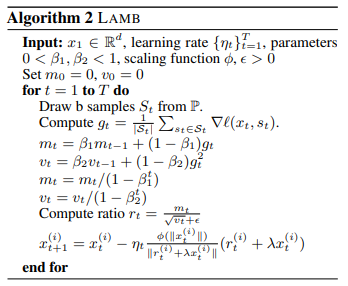

This approach has significantly improved the training process of the BERT model, even on large-size batches without loss of accuracy. So the Google Brain team managed to reduce the training time from 3 days to just 76 minutes, increasing the batch size to the memory limit of the TPUv3 module. Moreover, like other optimizers, LAMB has a number of modifications that can not only speed up learning (as in NVLAMB due to pre-normalization of gradients), but also make it even more stable in terms of convergence (as in N-LAMB and NN-LAMB).

# **Proximal methods**
Proximal methods are a class of algorithms designed to solve problems of convex optimization of nonsmooth functions. The main idea of such methods is to replace the original complex optimization problem with a series of more simple subtasks, approximating the new solution to the current one. In other words, these methods are a generalization of projective gradient methods.

# **Proximal minimization method**

It can be useful in cases where it is difficult to minimize the loss function $f$, but it is easy (or at least easier) to minimize its regularized version, that is, $f$ plus a quadratic value. This algorithm has many different interpretations depending on the purpose of use. The most popular are the following:

- 1) **Tikhonov regularization** allows $w_{k+1}$ to be close to $w_k$ and accelerates convergence, especially when using the conjugate gradient method. This is due to the fact that
the presence of regularization ensures a strong convexity of the problem:

$$w_{k+1} = \text{argmin} \left\{ f(w) + \frac{1}{2\alpha_k} \| w - w_k \|^2 \right\} = prox_{\alpha_k f}(w_k)$$

- 2) **Gradient flow** ensures convergence at the minimum point from any starting point at $t\to \infty$:

$$\frac {d}{dt} w(t) = - \nabla f(w(t))$$

Having solved this differential equation using the forward Euler scheme, we obtain:

$$w_{k+1} = w_k - \alpha \nabla f(w_k)$$

However, this solution is less stable than using the backword Euler scheme. Then the task takes the form:

$$\frac{w_{k+1} - w_k}{\alpha} = - \nabla f(w_{k+1})$$

Since the equation is presented implicitly, and its left side is essentially the gradient of the function $g(w^*)$ at the point $w_{k+1}$, then for the convex case:

$$\nabla (f(w^*) + g(w^*))(w_{k+1}) = 0 \Rightarrow \\ \Rightarrow w_{k+1} = \text{argmin} \left\{ f(w^*) + \frac{1}{2\alpha_k} \| w^* - w_k \|^2 \right\} = prox_{\alpha_k f}(w_k)$$

It is also worth noting that the idea of gradient flow can be generalized to cases where $f$ is not differentiated by subgradient differential inclusion:

$$\frac {d}{dt} w(t) \in - \partial f(w(t))$$

- 3) **Iterative refinement** is based on the idea of asymptotically disappearing Tikhonov regularization and is used to solve linear equations of the form $Xw=y$ using the Cholesky factorization for $X+\frac{1}{\alpha}I$.

Consider the problem of minimizing a quadratic function:

$$f(w) = \frac{1}{2} w^T X w - y^T w$$

where $X\in S_+^n$ (the set of symmetric positive semidefinite $n$ x $n$ matrices). A such problem is equivalent to solving a system of linear equations $Xw = y$. When $X$ is nonsingular, the only solution is $w=X^{-1} y$. The same problem can be seen in the least squares method. The proximal operator for $f$ at $w_k$ can be expressed analytically:

$$prox_{\alpha_k f}(w_k) = \text{argmin} \left\{ \frac{1}{2} w^T X w - y^T w + \frac{1}{2} \| w - w_k \|^2   \right\} = \left(X + \frac{1}{\alpha} I \right)^{-1} \left(y + \frac{1}{\alpha} w_k \right)$$

By rewriting this expression, we get:

$$w_{k+1} = w_k + \left(X + \frac{1}{\alpha} I \right)^{-1} (y - X w_k)$$

# **Proximal gradient method (PGM)**

It is used to solve a problem of the form $min\rightarrow f(w)+g(w)$, where $f$ is smooth (differentiable) and $g$ is a non-smooth function for which there is a fast proximal operator. Then, by performing a gradient step on $f$ and a proximal step on $g$, we get an iterative process of the form:

$$w_{k+1} = prox_{\alpha_k g} (w_k - \alpha_k \nabla f(w_k))$$

Another such process is called forward-backward splitting, where forward refers to the gradient step, and backward refers to the proximal step.

PGM also has different interpretations:

- 1) **Majorization-minimization** is used to solve the problem of the form:

$$min \rightarrow q_{\alpha}(w, w_k) = \frac{1}{2} \| w - (w_k \ - \alpha_k \nabla f(w_k)) \|^2  + \alpha g(w)$$

And the process of updating $w_{k+1}$ looks like this:

$$w_{k+1} = \text{argmin} \ q_{\alpha}(w, w_k)$$

- 2) **Fixed point iteration** is based on the idea that there is a fixed point $w^*$, which is the solution of $min\rightarrow f(w)+g(w)$ only if it is the point of the forward-backward operator:

$$(I + \alpha \partial g)^{-1} (I - \alpha \nabla f)$$

Then the solution takes the form:

$$w^* = (I + \alpha \partial g)^{-1} (I - \alpha \nabla f) (w^*) = prox_{\alpha g} (w^* - \alpha_k \nabla f(w^*))$$

- 3) **Forward-backward integration of gradient flow** is a method of numerical integration of the differential equation of gradient flow, which uses the forward Euler step for the differentiable part of $f$ and the backward Euler step for the possibly undifferentiated part of $g$. If we assume that $g$ is also differentiable, then the gradient flow system can be represented as:

$$\frac {d}{dt} w(t) = - \nabla f(w(t)) - \nabla g(w(t))$$

Then we get an update process called forward-backward splitting:

$$w_{k+1} = (I + \alpha \nabla g)^{-1} (I - \alpha \nabla f) w_k$$

It is also worth adding that there is a variant of the **accelerated proximal gradient method**, which includes an extrapolation step:

$$z_{k+1} = w_k + p_k (w_k - w_{k-1})$$

$$w_{k+1} = prox_{\alpha_k g} (z_{k+1} - \alpha_k \nabla f(z_{k+1}))$$

where $p_k$ is an extrapolation parameter, and one of the simplest schemes for calculating it looks like this:

$$p_k = \frac {k}{k + 3}$$

# **ISTA (Iterative Shrinkage(Soft)-Thresholding Algorithm)**

This method can be considered as an update of the proximal gradient applied to the L1-regularized least squares problem:

$$\|Xw - y\|^2 + \lambda \|w\| \rightarrow min$$

Then the prox-operator for the l1-norm will look like this:

$$prox_{\lambda \alpha} (w) = argmin \left\{\frac{1}{2 \alpha} \|w - w^* \|^2 + \lambda \|w^* \| \right\} = argmin \left\{\sum_{i=1}^d  \left[ \frac{1}{2 \alpha} (w_i - w_i^*) + \lambda |w_i^*| \right] \right\} = T_{\lambda \alpha} (w)$$

where $T_{\lambda\alpha}(w)$ is an operator with smooth threshold setting, which for a one-dimensional problem is a solution with the following rule:

$$ T_{\lambda \alpha} (w_i) = \begin{cases} w_i - \lambda \alpha, \ \ w_i \geq \lambda \alpha \\ 0, \ \ \ \ \ \ \ \ \ \ \ \ \  |w_i| \leq \lambda \alpha \\ w_i + \lambda \alpha, \ \ w_i \leq - \lambda \alpha  \\ \end{cases} $$

From here we get a gradient update step:

$$w_{k+1} = T_{\lambda \alpha_k} (w_k - \alpha_k X^T (Xw_k- y))$$

As you can see, this method allows you to obtain a sparse model, since part of the coordinates will be calculated as zero in the case of $|w_i|\leq\alpha$, which is especially useful in computer vision and signal processing tasks. However, ISTA in its pure form has a low convergence rate, so in practice its various modifications are used. For example, **FISTA**(from the word Fast), based on Nesterov acceleration, where an additional extrapolation step is used:

$$t_{k+1} = \frac{1 + \sqrt{1 + 4t_k^2}}{2}$$

$$z_{k+1} = w_k + \frac{t_k - 1}{t_{k+1}} (w_k - w_{k-1})$$

$$w_{k+1} = prox_{\lambda \alpha} (z_{k+1}) = T_{\lambda \alpha_k}(z_{k+1} - \alpha_k \nabla f(z_{k+1}))$$

This approach allowed to achieve the convergence rate of $O(1/k^2)$ instead of $O(1/k)$ as in ISTA. By the way, today FISTA also has a number of modifications that make its operation more stable and faster in some cases.

# **Second-order methods**

Second-order optimization methods are algorithms that use information about the second derivatives (Hessian) of the loss function to find minimum points faster and more accurately with a very uneven and complex loss landscape.

The second derivative characterizes the rate of change in the gradient of the loss function by measuring its curvature, that is, it allows you to estimate the expected improvement from the step of gradient descent. Using the example of a quadratic function, this would mean the following:

- 1) If the curvature is negative (the negative value of the second derivative), then the loss function decreases faster than expected based on the gradient prediction. This can lead to faster achievement of the minimum, but also increases the risk of jumping it over when using large steps.
- 2) If the curvature is zero (zero value of the second derivative), then the gradient accurately indicates a change in the loss function. In this case, gradient descent will effectively minimize the loss function, since there is neither acceleration nor deceleration in changing its values.
- 3) If the curvature is positive (the positive value of the second derivative), then the loss function decreases more slowly than expected based on the gradient prediction. This suggests that using too large steps can't only slow down the convergence process, but also increase the value of the loss function, moving away from the optimal solution.

# **Newton's method**

Uses second-order Taylor series expansion to approximate the function $f(w)$ in the vicinity of the point $t$:

$$f(w + t) \approx f(w) + \nabla f(w)t + \frac{1}{2} \nabla ^ 2 (w) t^2$$

Equating $\nabla f(w+ t)$ to zero, we get the optimal solution, that is, the direction of descent:

$$0 = \frac{d f(w + t)}{dt} = \nabla f(w) + \nabla ^ 2 f(w) \Rightarrow \\
\Rightarrow t = - \frac {\nabla f(w)}{\nabla ^ 2 f(w)} = - H^{-1}(w) \nabla f(w)$$

Then we get an iterative process of updating the parameters of the following type:

$$w_{k+1} = w_k + t_k = w_k - \alpha_k H^{-1} (w_k) \nabla f (w_k)$$

If the step $\alpha_k = 1$, then this is the classical Newton method, and with a different step size $\alpha_k\in (0, 1)$ we get the damped Newton method.

This approach provides a quadratic convergence rate in the vicinity of the optimum due to a more correct estimation of the curvature of the lines of the loss function level, which also makes it resistant to ill-conditioned problems (problems in which a small change in the initial data can lead to significant errors in the solution).

However, Newton's method is applicable only in the case of a positive definite matrix $H$, in other words, if not all the Hessian eigenvalues are positive near the saddle point, then the parameter update may occur in the wrong direction. One of the simplest solutions to this problem is to regularize the Hessian by adding the constant $\lambda$:

$$w_{k+1} = w_k + t = w_k - \alpha_k [H^{-1} (w_k) + \lambda I] \nabla f (w_k)$$

In addition, Newton's method has 2 more serious drawbacks that make it inapplicable to neural networks with a large number of parameters:
- 1) Sensitivity to the choice of the starting point. The quadratic convergence rate is provided only in the vicinity of the optimum, so if the starting point is located far from it, then the algorithm will converge more slowly and may not converge at all. This implies the need to select the step $\alpha_k$ as in the case of gradient descent. This problem can also be partially solved by using various types of regularization, for example, such as cubic.
- 2) High demands on computing resources. Since the number of Hessian elements
is equal to the square of the number of parameters $d$, the memory cost for storing them will be $O(d^2)$, and the computational complexity of the algorithm will be $O(d^3)$.

Next, we will consider alternatives that use some of the advantages of Newton's method, but at the same time do not require such large computational costs.

# **Conjugate gradient method**

Unlike the steepest descent method, this method uses descent in conjugate directions. This means that unlike the steepest descent method, where the direction of descent always coincides with the anti-gradient of the current point and can lead to zigzag trajectories, in this case, the directions of descent $d$ are chosen in a such way that they are conjugate (orthogonal) relative to the hessian of the loss function, that is, the current direction is chosen taking into account the previous value:

$$d_k = \nabla f(w) + \beta_k d_{t-1}$$

The directions $d_k$ and $d_{k-1}$ are conjugate if the condition $d_k^T H d_{k-1}=0$ is fulfilled, and the coefficient $\beta_k$ determines which part of the direction $d_{k-1}$ should be added to the current search direction.

You can find conjugate directions by simply obtaining the eigenvectors $H$ for $\beta_k$, however, this is computationally inefficient, so the following methods are usually used to calculate $\beta_k$:

- 1) The Fletcher-Reeves method:

$$\beta_k = \frac{\nabla f(w_k)^T \nabla f(w_k)}{\nabla f(w_{k-1})^T \nabla f(w_{k-1})}$$

- 2) The Polak-Ribiere method:

$$\beta_k = \frac{(\nabla f(w_k) - \nabla f(w_{k-1}))^T \nabla f(w_k)}{\nabla f(w_{k-1})^T \nabla f(w_{k-1})}$$

It follows that for a quadratic surface, the conjugacy of directions guarantees the search for a minimum in no more than $d$ searches in $d$-dimensional space. If the loss function goes beyond the simple quadratic form and becomes more complex, then it is not always possible to ensure that the minimum is maintained along previously defined conjugate directions. Therefore, in the nonlinear case of conjugate gradients, the restart procedure is periodically performed when the algorithm starts searching anew along the direction of the unchanged gradient, which ultimately makes it possible to better adapt to changes in the landscape of the loss function and more efficiently find the minimum points.



# **BFGS (Broyden–Fletcher–Goldfarb–Shanno)**

It is one of the most well-known quasi-Newton methods and is based on the approximation of the inverse Hessian by the matrix $M$, which is iteratively refined during low-rank updates. Denoting the Hessian approximation by a symmetric positive definite matrix $B_k$ of size $d \ \text{x} \ d$, we get a loss function similar to Newton's method:

$$m(w_{k+1}) \approx f(w_{k+1}) + \nabla f(w_{k+1})t + \frac{1}{2} \nabla ^ 2 (w_{k+1}) t^2$$

Based on the information from the last step, $B_{k+1}$ must satisfy the condition that the gradient is $m(w_{k+1})$ corresponds to the gradient of $f$ in the last two iterations of $w_k$ and $w_{k+1}$:

$$\nabla m(w_k - w_{k+1}) = \nabla m(- \alpha_k d_k) = \nabla f(w_{k+1}) - B_{k+1} \alpha_k  d_k = \nabla f(w_k)$$

From here we get the secant equation, which is also known as the quasi-Newton condition:

$$B_{k+1} \alpha_k  d_k = \nabla f(w_{k+1}) - \nabla f(w_k)$$

Let's rewrite this equation in a more convenient form, making a few simplifications:

$$B_{k+1} s_k = y_k$$

$$s_k = (w_{k+1} - w_k) = \alpha_k d_k$$

$$y_k = \nabla f(w_{k+1}) - \nabla f(w_k)$$

According to this equation, the matrix $B_{k+1}$ can convert $s_k$ to $y_k$ only if they satisfy the curvature condition:

$$s_k^T y_k > 0$$

When this condition is fulfilled, the secant equation always has a solution, and for the unambiguous definition of $B_{k+1}$, an additional condition is introduced that among all symmetric matrices satisfying the secant equation, $B_{k+1}$ will be located closest to the current matrix $B_k$. In other words, we get a problem of the form:

$$min \rightarrow \|B - B_k \|$$

Which can be solved quite simply using the weighted Frobenius norm:

$$\|A \|_W = \|W^{1/2} A W^{1/2} \|_F$$

Where $\|\cdot\|_F$ is defined by $\|C\|^2_F=\sum_{i=1}^n\sum_{j=1}^n c^2_{ij}$, and the weight matrix $W$ can be chosen as any the condition $W y_k = s_k$ is performed. Let's define $W$ as the inverse averaged Hessian $\overline G_k^{-1}$, where:

$$\overline G_k = \int_{0}^{1} \nabla^2 f(w_k + \alpha_k d_k) d \lambda$$

Using Taylor's theorem, it can be shown that:

$$y_k = \overline G_k \alpha_k d_k = \overline G_k s_k$$

With this choice of the matrix $W$, the weighted Frobenius norm is dimensionless, which is a desirable property, since it avoids dependence on units of measurement when solving the minimization problem. Then we get a solution called the **DFP (Davidon-Fletcher-Powell) method**:

$$B_{k+1} = (I - \frac{y_k s_k^T}{y_k^T s_k}) B_k (I - \frac{s_k y_k^T}{y_k^T s_k}) + \frac{y_k y_k^T}{y_k^T s_k}$$

Since we are more interested in the inverse Hessian in quasi-Newton methods, we will rewrite this formula in a more convenient form. To do this, we define $M=B_k^{-1}$ and use a generalization of the Sherman–Morrison–Woodbury formula:

$$B^{-1} = A^{-1} - A^{-1} U (I + V^T A^{-1} U) V^T A^{-1}$$

In this case, the DFP solution takes the following form:

$$M_{k+1} = M_k - \frac{M_k y_k y_k^T M_k}{y_k^T M_k y_k} + \frac{s_k s_k^T}{y_k^T s_k}$$

This is the fundamental idea of the quasi-Newton update: instead of recalculating the approximate Hessians (or inverse Hessians) from scratch at each iteration, we apply a simple modification that combines the most recent observed information about the loss function with information from the current Hessian approximation.

However, the update formula from the DFP algorithm can be made even more efficient by doing similar procedures with $M_k$ instead of $B_k$. As a result, we will receive an update **BFGS**:

$$M_{k+1} = (I - \frac{s_k y_k^T}{y_k^T s_k}) M_k (I - \frac{y_k s_k^T}{y_k^T s_k}) + \frac{s_k s_k^T}{y_k^T s_k}$$

We can also derive a version of the BFGS algorithm that works with the Hessian approximation of $B_k$ rather than $M_k$ if we use the generalization of the Sherman–Morrison–Woodbury formula again:

$$B_{k+1} = B_k - \frac{B_k s_k s_k^T B_k}{s_k^T B_k s_k} + \frac{y_k y_k^T}{y_k^T s_k}$$

Then the direction of descent will look like this:

$$d_k = - M_k \nabla f(w_k)$$

And the parameters will be updated according to the following rule:

$$w_{k+1} = w_k + \alpha_k d_k$$

Similar to the conjugate gradient method, the BFGS algorithm creates a series of linear searches based on information about the curvature of the function, but the important difference is that in this case, reaching a point as close as possible to the true minimum along a given direction is not so critical. This makes this algorithm more efficient, since it does not require additional time to refine the results of each linear search, however, $O(d^2)$ memory is required to store the $M$ matrix, which is why this algorithm is also unsuitable for models with a large number of parameters.




# **SR1 (Symmetric Rank-1)**

It is a simpler rank 1 update that preserves the symmetry of the matrix and satisfies the secant equation, but at the same time there are no guarantees that the updated matrix $B_k$ (or $M_k$) will be positive definite. However, this method can be useful when the standard assumptions of the BFGS are not met or when it is necessary to use methods to determine the confidence area.

The symmetric rank 1 update, which is also known as the Broyden formula, has the general form:

$$B_{k+1} = B_k + \sigma v v^T$$

Where $\sigma \in\{-1, 1\}$, and is also selected together with $B_{k+1}$ in a such way as to satisfy the secant equation. Substituting the update above into this equation, we get:

$$y_k = B_k s_k + [\sigma v v^T] s_k$$

Since the term in parentheses is scalar, $v$ must be a multiple of $y_k - B_k s_k$ for some scalar value $\delta$:

$$y_k - B_k s_k = \sigma \delta^2 [s_k^T (y_k - B_k s_k)] (y_k - B_k s_k)$$

This equation is fulfilled only when:

$$\sigma = sign [s_k^T (y_k - B_k s_k)]$$

$$\delta = \pm |s_k^T (y_k - B_k s_k)|^{-1/2}$$

Therefore, the update formula for $B_k$ takes the following form:

$$B_{k+1} = B_k + \frac{(y_k - B_k s_k) (y_k - B_k s_k)^T}{(y_k - B_k s_k)^T s_k}$$

Applying a generalization of the Sherman–Morrison–Woodbury formula, we obtain an appropriate update for the inverse approximation of the Hessian $M_k$:

$$M_{k+1} = M_k + \frac{(s_k - M_k y_k) (s_k - M_k y_k)^T}{(s_k - M_k y_k)^T y_k}$$

Despite the less stable performance compared to DFP and BFGS, the advantage of SR1 is to create indeterminate Hessian approximations, which allows you to get more information about the local curvature of the loss function and better explore the space to find directions that can lead to a better solution.



# **L-BFGS (Limited-memory BFGS)**

This modification uses only the last $m$ (usually from 3 to 20) pairs of vectors $\{s_i, y_i\}$ and the initial approximation $M_0$ to approximate $M_k$, which allows you to have linear costs $O(md)$ not only for memory, but also for iteration. To understand better how this happens, let's first rewrite the BFGS update formulas in a simplified form:

$$w_{k+1} = w_k + \alpha_k M_k \nabla f (w_k)$$

$$M_{k+1} = V_k^T M_k V_k + \rho_k s_k s_k^T$$

$$V_k = I - \rho_k y_k s_k^T, \ \rho_k = \frac{1}{y_k^T s_k}$$

Then the approximation of $M_k$ can be represented as follows:

$$ \begin{align} M_k &= (V_{k-1}^{T} ... V_{k-m}^{T}) M_0 (V_{k-m} ... V_{k-1}) + \\ &+ \rho_{k-m} (V_{k-1}^T ... V_{k-m+1}^{T}) s_{k-m} s_{k-m}^T (V_{k-m+1} ... V_{k-1}) + \\ &+ \ ... \\ &+ \rho_{k-1} s_{k-1} s_{k-1}^T \end{align} $$

From this expression, we can derive a recursive algorithm for efficient calculating the product of $M_k\nabla f(w_k)$, which is called **L-BFGS two-loop recursion**:

$$ \begin{align*} & q \leftarrow \nabla f(w_k) \\ & \textbf{for } i \ = \ k - 1, \ k - 2, ..., \ k - m \\ & \hspace{1.3cm} \alpha_i \leftarrow \rho_i s_i^T q \\ & \hspace{1.3cm} q \leftarrow q - \alpha_i y_i \\ \\ & r \leftarrow M_0 q \\ & \textbf{for } i \ = \ k - m, \ k - m + 1, ..., \ k - 1 \\ & \hspace{1.3cm} \beta \leftarrow \rho_i y_i^T r \\ & \hspace{1.3cm} r \leftarrow r + s_i (\alpha_i - \beta) \\ \\ & M_k \nabla f(w_k) = r \end{align*} $$

The advantage of this recursion is that multiplication by the original matrix $M_0$ is isolated from the rest of the calculations, which allows you to select this matrix freely and change it between iterations. The method of choosing $M_0$, which has proven itself well in practice, is to set $M_0 = \gamma_k I$, where:

$$\gamma_k = \frac{s_{k-1}^T y_{k-1}}{y_{k-1}^T y_{k-1}}$$

In this case, $\gamma_k$ allows you to estimate the size of the true Hessian in the last search direction. This guarantees good scalability of the $d_k$ search direction, resulting in $\alpha_k = 1$ in most iterations. Now we can make a formal definition of the **L-BFGS** algorithm as follows:

$$ \begin{align*} & \text{Choose starting point } w_0 \\ & m > 0, \ k \leftarrow 0 \\ & \textbf{repeat until convergence} \\ & \hspace{1.3cm} M_0 = \gamma_k I \\ & \hspace{1.3cm} d_k = - M_k \nabla f(w_k) \hspace{0.4cm} \text{from algorithm above} \\ \\ & \hspace{1.3cm} w_{k+1} = w_k + \alpha_k d_k, \hspace{0.3cm} \text{where} \ \alpha_k \ \text{satisfies the Wolfe's conditions} \\ & \hspace{1.3cm} r \leftarrow r + s_i (\alpha_i - \beta) \\ & \hspace{1.3cm} \textbf{if } k > m: \\ & \hspace{2.6cm} \text{Discard the vector pair } \{s_{k-m}, y_{k-m} \} \ \text{from storage} \\ & \hspace{1.3cm} s_k \leftarrow w_{k+1} - w_k \\ & \hspace{1.3cm} y_k = \nabla f(w_{k+1}) - \nabla f(w_k) \\ & \hspace{1.3cm} k \leftarrow k + 1 \end{align*} $$

# **Shampoo**

The methods described above are still inferior in speed and memory consumption to conventional gradient methods, especially when training large deep neural networks. This is partly due to the fact that they require accurate, rather than stochastic, calculation of gradients. Ideally, we would like to have an algorithm that combines the accuracy of second-order algorithms and the speed of first-order algorithms. In an attempt to get closer to this goal, the Shampoo algorithm has appeared, which is used for stochastic optimization not only in matrix, but also in tensor spaces. Let's consider its main idea.

To begin with, this algorithm belongs to the so-called preconditioned methods (in the context of machine learning, preconditioning can be considered as the process of changing the conditions of a task so that algorithms can work with it more accurately and efficiently). Instead of using the inverse Hessian explicitly, Shampoo uses the product of gradients to form a preconditioned matrix, which performs a role similar to the Hessian, storing information about the curvature of the surface of the loss function. In fact, this algorithm is a multidimensional analog of AdaGrad, and for the matrix case, its principle of operation looks like this:

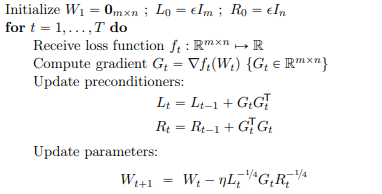

At each iteration, two preconditioned matrices are formed from $L_t$ matrices of size $m$x $m$ and $R_t$ matrices of size $n$ x$n$ containing information about the second moment from the accumulated gradients, which are then multiplied by a gradient matrix from left to right, respectively. Each of the preconditioned matrices works with only one dimension of the gradient, reducing the rest, which makes it possible to speed up the training process quite well. The amount of space that Shampoo uses in this case is $O(m^2+n^2)$ instead of $O(m^2 n^2)$ in comparison with full-matrix methods. Moreover, since preconditioning involves matrix inversion (and most often spectral decomposition), the amount of calculations for constructing left and right preconditioners is also reduced from $O(m^3 n^3)$ to $O(m^3+n^3)$.

However, shampoo still requires a lot of computing costs, which stands out especially when working with fully connected and embedding layers. The main difficulty arises when calculating the p-roots of the matrices $L_t^{-1/4}$ and $R_t^{-1/4}$, which were implemented using spectral decomposition (SVD), which can take a long time. Therefore, several improvements have been developed for the accelerated operation of Shampoo:

- 1) Calculation of preconditioners every few hundred steps. Since in most cases the structure of the loss function does not change significantly with each step, there should be no special effect on reducing accuracy.

- 2) Using efficient iterative methods to calculate p-roots instead of SVD, for example, using modifications based on the Schur-Newton method.

- 3) Using one of the preconditioners $L_t^{-1/2p}$ or $R_t^{-1/2q}$, where $p, q > 0$.

- 4) The application of parallel learning on the GPU.

It is worth noting that these improvements can be used without problems for Shampoo in its general form, which is applicable to tensors of arbitrary dimension. In deep learning frameworks, it is the tensor form of this algorithm that is implemented, and its principle of operation looks like this:

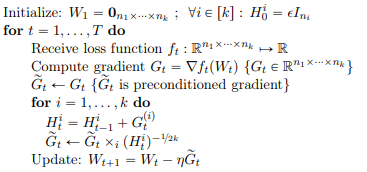

Having traced the history of the development of second-order methods, it becomes obvious that with the advent of algorithms such as Shampoo, their application is becoming more attractive from a practical point of view. In my humble opinion, their popularity will grow in the future and they will play a significant role not only in deep learning, but also in other fields of engineering and science.

# **Additional sources**

Papers:

- «Adam: A Method for Stochastic Optimization», Diederik P. Kingma, Jimmy Ba;

- «Decoupled Weight Decay Regularization», Ilya Loshchilov, Frank Hutter;

- «Incorporating Nesterov Momentum into Adam», Timothy Dozat;

- «Adaptive Methods for Nonconvex Optimization», Manzil Zaheer, Sashank J. Reddi, Devendra Sachan, Satyen Kale, Sanjiv Kumar;

- «Adan: Adaptive Nesterov Momentum Algorithm for Faster Optimizing Deep Models», Xingyu Xie, Pan Zhou, Huan Li, Zhouchen Lin, Shuicheng Yan;

- «On the Convergence of Adam and Beyond», Sashank J. Reddi, Satyen Kale, Sanjiv Kumar;

- «On the Convergence Proof of AMSGrad and a New Version», Tran Thi Phuong, Le Trieu Phong;

- «SGDR: Stochastic Gradient Descent with Warm Restarts», Ilya Loshchilov, Frank Hutter;

- «Optimization for deep learning: theory and algorithms», Ruoyu Sun;

- «Large Batch Training of Convolutional Networks», Yang You, Igor Gitman, Boris Ginsburg;

- «Large Batch Optimization for Deep Learning: Training BERT in 76 minutes», Yang You, Jing Li, Sashank Reddi, Jonathan Hseu, Sanjiv Kumar, Srinadh Bhojanapalli, Xiaodan Song, James Demmel, Kurt Keutzer, Cho-Jui Hsieh;

- «Proximal Algorithms», Neal Parikh, Stephen Boyd;

- «A Fast Iterative Shrinkage-Thresholding Algorithm», for Linear Inverse Problems, Amir Beck, and Marc Teboulle;

- «Improving Fast Iterative Shrinkage-Thresholding Algorithm: Faster, Smarter and Greedier», Jingwei Liang, Tao Luo, Carola-Bibiane Schönlieb;

- «Resurrecting the sigmoid in deep learning through dynamical isometry: theory and practice»,
Jeffrey Pennington, Samuel S. Schoenholz, Surya Ganguli;

- «Numerical Optimization», Jorge Nocedal, Stephen J. Wright;

- «A regularized limited-memory BFGS method for unconstrained minimization problems», Shinji SUGIMOTO and Nobuo YAMASHITA;

- «Shampoo: Preconditioned Stochastic Tensor Optimization», Vineet Gupta, Tomer Koren, Yoram Singer;

- «Scalable Second Order Optimization for Deep Learning», Rohan Anil, Vineet Gupta, Tomer Koren, Kevin Regan, Yoram Singer;

- «A Schur-Newton method for the matrix p'th root and its inverse», C.-H. Guo and N. J. Higham.

Video:

- [batch gradient descent](https://www.youtube.com/watch?v=sDv4f4s2SB8);

- [stochastic and mini-batch gradient descents](https://www.youtube.com/watch?v=vMh0zPT0tLI);

- [gradient descent optimizations](https://www.youtube.com/playlist?list=PLRznHSqUb86uuNA4eT96lk9_Y_CTwJlkK).